# Insurance Purchase Prediction Using Deep Neural Network

## Group3 HW4

**Hukai Luo, Tae Park, Xuanbo Huang**

## Q1 Explore all other variables

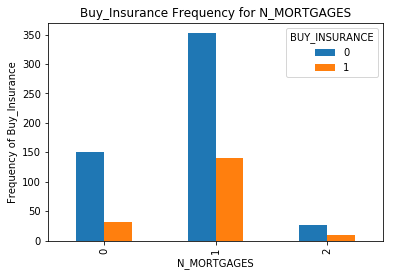

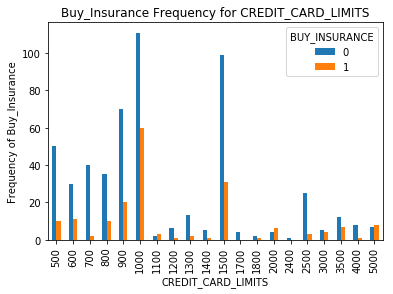

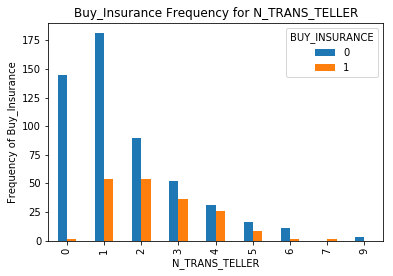

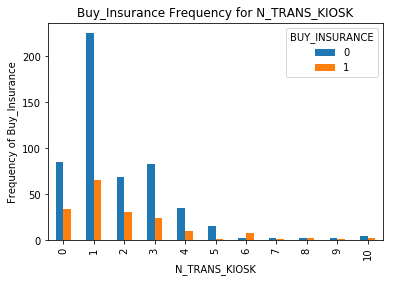

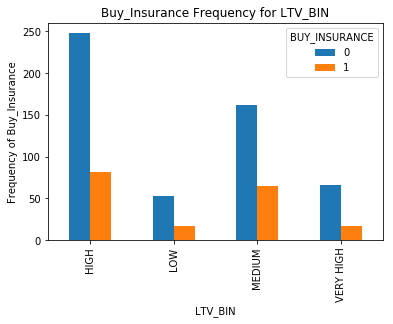

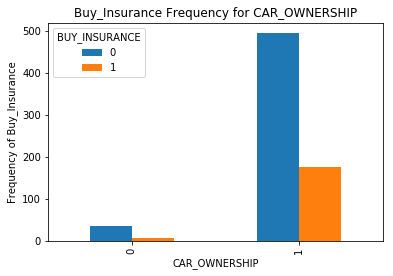

In [19]:
import numpy as np
import math
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import os
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")
os.chdir(r"C:\Users\User\Desktop\2019 Spring\Big Data\Week4")

insurance_df = pd.read_csv("data.csv",header =0)
insurance_df.head()

insurance_df.groupby(['BUY_INSURANCE'])[['BUY_INSURANCE']].count()
pd.crosstab(insurance_df.N_MORTGAGES,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for N_MORTGAGES')
plt.xlabel('N_MORTGAGES')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

pd.crosstab(insurance_df.CREDIT_CARD_LIMITS,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for CREDIT_CARD_LIMITS')
plt.xlabel('CREDIT_CARD_LIMITS')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

pd.crosstab(insurance_df.N_TRANS_TELLER,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for N_TRANS_TELLER')
plt.xlabel('N_TRANS_TELLER')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

pd.crosstab(insurance_df.N_TRANS_KIOSK,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for N_TRANS_KIOSK')
plt.xlabel('N_TRANS_KIOSK')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

pd.crosstab(insurance_df.LTV_BIN,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for LTV_BIN')
plt.xlabel('LTV_BIN')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

pd.crosstab(insurance_df.CAR_OWNERSHIP,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for CAR_OWNERSHIP')
plt.xlabel('CAR_OWNERSHIP')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

### preprocessing

In [4]:
cat_vars=['STATE','REGION','SEX','PROFESSION','MARITAL_STATUS']
for var in cat_vars:
    # cat_list='var' + '_' + var
    cat_list = pd.get_dummies(insurance_df[var], prefix=var)
    insurance_df=pd.concat([insurance_df,cat_list],axis = 1) # concat horizontally with newly dummy features

transformed_cols = insurance_df.columns

In [5]:
# remove the original categorical variables
data_vars=insurance_df.columns.values.tolist()
selected_columns = list(set(data_vars).difference(set(cat_vars)))
np.array(selected_columns)

# now only get variables after converting to dummy variables
data = insurance_df[selected_columns]
data.head()

,PROFESSION_PROF-46,MARITAL_STATUS_WIDOWED,BANK_FUNDS,PROFESSION_Bank Teller,PROFESSION_Clerical,PROFESSION_Not specified,REGION_Midwest,PROFESSION_PROF-47,PROFESSION_PROF-33,PROFESSION_Homemaker,...,T_AMOUNT_AUTOM_PAYMENTS,N_TRANS_WEB_BANK,PROFESSION_PROF-32,PROFESSION_PROF-9,TIME_AS_CUSTOMER,STATE_UT,PROFESSION_Fireman,PROFESSION_PROF-56,PROFESSION_Medical Doctor,PROFESSION_PROF-61
0,0,0,0,0,0,0,0,0,0,0,...,504,0,0,0,2,0,0,0,0,0
1,0,0,2900,0,0,0,0,0,0,0,...,1311,3063,0,1,1,0,0,0,0,0
2,0,0,500,0,0,0,0,0,0,0,...,539,0,0,0,3,0,0,0,0,0
3,0,0,12500,0,0,0,0,0,0,0,...,59437,3000,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,300,0,0,3,1,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
X = data[data.columns.difference(['BUY_INSURANCE','LTV_BIN'])]

# Min-max scaling. 
# XX and y are array/list
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XX = scaler.fit_transform(X)
y = data[['BUY_INSURANCE']].values.astype('float64')
                                          
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=0)
X_train_os,y_train_os=os.fit_sample(X_train, y_train)
                                          
y_train_df= pd.DataFrame(data=y_train_os,columns=['BUY_INSURANCE'])
y_train_df.groupby(['BUY_INSURANCE'])[['BUY_INSURANCE']].count()
y_train_os = y_train_os.reshape(-1, 1)

## Q2 normalize function

In [21]:
def normalize(X):
    min_max_scaler = preprocessing.MinMaxScaler()
    Xnorm = min_max_scaler.fit_transform(X)
    return Xnorm

## Q3 sigmoid function

In [8]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
def sigmoidPrime(z):
    #derivative of sigmoid
    return z * (1 - z)

## Q4 gradient function

In [13]:
#initialize theta
(row,col) = X_train_os.shape
inputSize = col
outputSize = 1
hiddenSize = row
W1 = np.random.randn(inputSize, hiddenSize)   # weight matrix from input to hidden layer
W2 = np.random.randn(hiddenSize, outputSize)  # weight matrix from hidden to output layer
theta = (W1,W2)

def gradient(theta, learning_rate = 0.01):
    W1 = theta[0]
    W2 = theta[1]
    #forward propagation
    z = np.dot(X_train_os, W1)     
    z2 = sigmoid(z) 
    z3 = np.dot(z2, W2) 
    o = sigmoid(z3)
    
    #backward
    o_error = y_train_os - o                # error in output
    o_delta = o_error*sigmoidPrime(o)       # applying derivative of sigmoid to error
    z2_error = o_delta.dot(W2.T)            # z2 error: how much our hidden layer weights contributed to output error
    z2_delta = z2_error*sigmoidPrime(z2)    # applying derivative of sigmoid to z2 error
    
    W1 += learning_rate * X_train_os.T.dot(z2_delta)  # adjusting first set (input --> hidden) weights
    W2 += learning_rate * z2.T.dot(o_delta)           # adjusting second set (hidden --> output) weights
    theta =(W1,W2)
    
    return theta

## Q5 computecost function

In [14]:
def computeCost(X, y, theta, lambd):
    m = len(y)
    W1 = theta[0]
    W2 = theta[1]
    #forward propagation
    z = np.dot(X_train_os, W1)     
    z2 = sigmoid(z) 
    z3 = np.dot(z2, W2) 
    output = sigmoid(z3)
    _y = y.reshape(-1, 1)
    
    J = 1/m*np.sum(-_y*np.log(output)-(1-_y)*np.log(1-output))+np.sum(lambd/(2*m)*(theta[0].T@theta[0]+theta[1].T@theta[1]))
    return J

## Q6 computeGrad function

In [15]:
def computeGrad(X, y, theta, lambd):
    m = len(y)
    
    W1 = theta[0]
    W2 = theta[1]
    z = np.dot(X_train_os, W1)     
    z2 = sigmoid(z) 
    z3 = np.dot(z2, W2) 
    o = sigmoid(z3)
    
    #backward
    o_error = y_train_os - o                # error in output
    o_delta = o_error*sigmoidPrime(o)       # applying derivative of sigmoid to error
    z2_error = o_delta.dot(W2.T)            # z2 error: how much our hidden layer weights contributed to output error
    z2_delta = z2_error*sigmoidPrime(z2)    # applying derivative of sigmoid to z2 error
    
    grad1 = z2_delta/m + lambd*W1
    grad2 = o_delta/m + lambd*W2
    return (grad1,grad2)

## Q7 predict function

In [16]:
def predict(theta, X):
    W1 = theta[0]
    W2 = theta[1]
    #forward propagation
    z = np.dot(X, W1)     
    z2 = sigmoid(z) 
    z3 = np.dot(z2, W2) 
    o = sigmoid(z3)
    
    prediction = np.array(o > 0.5)
    n = len(prediction)
    tn, fp, fn, tp = confusion_matrix(y_train_os,prediction).ravel()
    my_accuracy = ((tp + tn) / n)*100
    print ('neutral network Accuracy %: ', my_accuracy)
    my_precision = (tp / (tp + fp))*100
    print ('neutral network Precition %: ', my_precision)
    my_recall = (tp / (tp + tn))*100
    print ('neutral network Recall %: ', my_recall)
    return prediction
predict(theta, X_train_os)

neutral network Accuracy %:  51.05540897097626
neutral network Precition %:  50.53619302949062
neutral network Recall %:  97.41602067183463


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

## Q8 optimize function

In [17]:
def optimizeCost(theta, X, y, maxiter,lambd=0.01):
    for i in range(maxiter):
        W1 = theta[0]
        W2 = theta[1]
        #forward propagation
        z = np.dot(X, W1)     
        z2 = sigmoid(z) 
        z3 = np.dot(z2, W2) 
        o = sigmoid(z3)
        
        #backward
        o_error = y - o                # error in output
        o_delta = o_error*sigmoidPrime(o)       # applying derivative of sigmoid to error
        z2_error = o_delta.dot(W2.T)            # z2 error: how much our hidden layer weights contributed to output error
        z2_delta = z2_error*sigmoidPrime(z2)    # applying derivative of sigmoid to z2 error
        W1 += lambd * X.T.dot(z2_delta)  # adjusting first set (input --> hidden) weights
        W2 += lambd * z2.T.dot(o_delta)           # adjusting second set (hidden --> output) weights
        theta =(W1,W2)
    
    return theta
theta = optimizeCost(theta, X_train_os, y_train_os, maxiter=1000)
print("weight1 \n", theta[0])
print("weight2 \n", theta[1])

weight1 
 [[-0.21697001  1.36650831  0.07819278 ...  0.70363468 -2.13352678
   1.4061459 ]
 [-1.40869873  0.30637511  0.13549869 ... -0.42058074 -0.87305025
   0.30726489]
 [ 1.01731743  0.49984623 -0.00440189 ...  0.01065693  1.39994475
   0.12310169]
 ...
 [ 1.20149244 -0.71109372 -1.02242436 ... -1.96684181 -0.86610546
   0.94747817]
 [-0.92079323  0.41938    -0.29522635 ... -0.42827262 -0.07300502
   2.26893763]
 [-0.83265091 -0.05796717 -0.09580793 ...  0.83819335  0.84294826
  -1.01754493]]
weight2 
 [[-9.89729267e-01]
 [ 1.67243593e+00]
 [-1.08953429e+00]
 [ 7.63502820e-01]
 [-4.23222746e-01]
 [ 2.68641053e-02]
 [-2.00803184e-01]
 [ 4.62854456e-02]
 [-8.41573263e-01]
 [ 4.42555599e-01]
 [-1.78377169e+00]
 [ 2.74011242e+00]
 [-1.88145817e+00]
 [ 2.05846285e+00]
 [ 1.11654376e+00]
 [-3.20299298e-01]
 [-1.20874655e+00]
 [-1.00546697e+00]
 [-1.49653274e+00]
 [-3.56336336e-02]
 [-2.09800492e+00]
 [ 3.08248720e-01]
 [ 1.63302277e-02]
 [-5.25356225e-01]
 [-2.43261329e-02]
 [-1.69755090

### predict using updated theta

In [18]:
predict(theta, X_train_os)

neutral network Accuracy %:  96.96569920844327
neutral network Precition %:  96.11398963730569
neutral network Recall %:  50.476190476190474


array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [